# Imports

In [60]:
from jotebook_template import *

SyntaxError: invalid syntax (jotebook_template.py, line 26)

In [61]:
from numpy import *

# Building parts

In [10]:
 del omega_1, total_time, epsilon, 
omega_1 = 0.5
total_time = 2*pi/omega_1
epsilon = 10**(-6)
max_iter = 100
time_steps = 200
dt = total_time/time_steps

NameError: name 'omega_1' is not defined

In [11]:
del Lin, Ti

NameError: name 'Lin' is not defined

In [12]:
Lin

NameError: name 'Lin' is not defined

## level 1

In [13]:
def H1(omega_1):
    r"""Brief description of the function"""
    H1 = omega_1*sigmaz()
    return H1


In [14]:
def H2():
    r"""Brief description of the function"""
    H2 = sigmay()
    return H2

In [15]:
#I = identity(2)
del I

NameError: name 'I' is not defined

In [16]:
def T_maker(Ti):
    r"""Brief description of the function"""
    T = tensor(Ti.trans(), Ti)
    return T

In [17]:
 tensor(identity(2), T_maker(sigmax()))

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]

## level 2

In [18]:
def Hamil(omega_1, xi):
    H = H1(omega_1) + xi*H2()
    return H

In [19]:
Hamil(2, 0.5 )

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 2.+0.j   0.-0.5j]
 [ 0.+0.5j -2.+0.j ]]

In [20]:
def leftover(Lin):
    r"""Brief description of the function"""
    d = Lin.shape[0]
    I = identity(d)
    term1 = tensor(Lin.trans(), Lin)
    term2 = tensor(I, ((Lin.dag())*(Lin)))
    term3 = tensor(((Lin.trans())*(Lin.conj())), I)
    leftover = 1j*(0.1)*(term1 - 0.5*(term2 + term3))
    return leftover


def A(omega_1, xi, Lin):
    H = Hamil(omega_1, xi)
    d = Lin.shape[0]
    I = identity(d)
    A = tensor(I, H) - tensor((H.conj()), I) + leftover(Lin)
    return A

In [21]:
A(2, 0.5, sigmaz())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.+0.j   0.-0.5j  0.-0.5j  0.+0.j ]
 [ 0.+0.5j -4.-0.2j  0.+0.j   0.-0.5j]
 [ 0.+0.5j  0.+0.j   4.-0.2j  0.-0.5j]
 [ 0.+0.j   0.+0.5j  0.+0.5j  0.+0.j ]]

In [22]:
A(0, 0.5, sigmaz())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.+0.j  0.-0.5j 0.-0.5j 0.+0.j ]
 [0.+0.5j 0.-0.2j 0.+0.j  0.-0.5j]
 [0.+0.5j 0.+0.j  0.-0.2j 0.-0.5j]
 [0.+0.j  0.+0.5j 0.+0.5j 0.+0.j ]]

In [23]:
I

NameError: name 'I' is not defined

In [24]:
#term1 = tensor(Lin.trans(), Lin)
#term2 = tensor(I, ((Lin.dag())*(Lin)))
#term3 = tensor(((Lin.trans())*(Lin.conj())), I)
#leftover = 1j*(0.1)*(term1 - 0.5*(term2 + term2))
def x_k(omega_1, Lin ):
    r"""Brief description of the function"""
    #H11 = H1(omega_1)
    #H2_i = H2()
    d = Lin.shape[0]
    I = identity(d)
    x_k = tensor(I, H2()) - tensor((H2().conj()), I) #+ leftover(Lin)
    return x_k


In [25]:
I

NameError: name 'I' is not defined

In [26]:
x_k(0.5, sigmaz())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j 0.-1.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+1.j 0.+1.j 0.+0.j]]

In [27]:
def L(omega_1, xi, Lin, dt):
    #H = H1
    L = (-1j*A(omega_1, xi, Lin)*dt).expm()
    return L

In [28]:
L(0.5, 2, sigmaz(), 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99996000e-01+0.00000000e+00j -1.99979435e-03-9.99865260e-07j
  -1.99979435e-03+9.99865260e-07j  3.99972768e-06+0.00000000e+00j]
 [ 1.99979435e-03+9.99865260e-07j  9.99795521e-01+9.99797187e-04j
  -3.99946104e-06+0.00000000e+00j -1.99979435e-03-9.99865260e-07j]
 [ 1.99979435e-03-9.99865260e-07j -3.99946104e-06+0.00000000e+00j
   9.99795521e-01-9.99797187e-04j -1.99979435e-03+9.99865260e-07j]
 [ 3.99972768e-06+0.00000000e+00j  1.99979435e-03+9.99865260e-07j
   1.99979435e-03-9.99865260e-07j  9.99996000e-01+0.00000000e+00j]]

In [29]:
def L_I(Ti):
    r"""Brief description of the function"""
    d = Ti.shape[0]
    I = identity(d)
    L_I = tensor(I, I)
    return L_I

In [30]:
L_I(sigmay())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

## parameters

### sub sub topic 1

In [31]:
# building the function to optimize (optimizee)
def L_vec(omega_1, xi_vec, Lin, dt):
    #xi_vec_size = 2#xi_vec.size # finding the size of xi
    L_vec = [L(omega_1, xi, Lin, dt) for xi in xi_vec] 
    # constructing L #[L(1.0), L(2.0)]
    
    return L_vec


In [32]:
def fidelity_calc(A, B):
    r"""Brief description of the function"""
    d1 = A.shape[0] # Assuming no rectangular shaped matrices
    d2 = B.shape[0] # Assuming no rectangular shaped matrices
    d = d1*d2
    first_part = (A - B).dag()
    second_part = (A - B)
    f_int = (first_part* second_part)
    f = f_int.tr()
    return f

In [33]:
def L_full_maker(Ti, omega_1, xi_vec, Lin, dt):
    r"""Brief description of the function"""
    xi_vec_size = xi_vec.size # finding the size of xi
    L_full = L_I(Ti) # Identity for the for loop of L
    L_v = L_vec(omega_1, xi_vec, Lin, dt) # calling L_vec
    for i in range(xi_vec_size): # generating L_full
        L_full = L_full*L_v[xi_vec_size - 1 - i]
    return L_full

In [34]:
def F(Ti, omega_1, xi_vec, Lin, dt):
    r"""Brief description of the function"""
    L_full = L_full_maker(Ti, omega_1, xi_vec, Lin, dt)
    T = T_maker(Ti)
    F = real(-fidelity_calc(T, L_full))   
    return F

In [35]:
fidelity_calc(sigmax(), sigmay())

4.0

In [36]:
fidelity_calc(sigmay(), sigmay())

0.0

In [37]:
xi_vec_test = array([1.0, 2.0])
xi_vec_test

array([1., 2.])

In [38]:
xi_vec_test.size

2

In [39]:
w_vec = [xi**2 for xi in xi_vec_test]
w_vec

[1.0, 4.0]

In [40]:
# F(Ti, omega_1, xi_vec, Lin, dt)
F(sigmax(), 0.5 , xi_vec_test, sigmaz(), 0.001)

-7.998400634493139

In [41]:
def L_comma_k_maker(Ti, omega_1, xi_vec, k, Lin, dt):
    N = xi_vec.size
    L_v = L_vec(omega_1, xi_vec, Lin, dt)
    
    inner_part = L_I(Ti)
    for i in range(N):
        if i == ( N - 1 - k ):
            inner_part = inner_part*x_k(omega_1, Lin )*L_v[k - 1]
        else:
            inner_part = inner_part*L_v[N - 1 - i]
    l_comma_k = inner_part
    return l_comma_k
    

In [42]:
#L_comma_k_maker(Ti, omega_1, xi_vec, k, Lin, dt)
L_comma_k_maker(sigmax(), 0.5 , xi_vec_test, 2, sigmaz(), 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99991001e-01+0.00000000e+00j -2.99927960e-03-3.49898670e-06j
  -2.99927960e-03+3.49898670e-06j  8.99883703e-06+0.00000000e+00j]
 [ 2.99948056e-03+2.49939255e-06j  9.99589083e-01+1.99918650e-03j
  -8.99750347e-06+2.99899242e-09j -2.99948056e-03-2.49939255e-06j]
 [ 2.99948056e-03-2.49939255e-06j -8.99750347e-06-2.99899242e-09j
   9.99589083e-01-1.99918650e-03j -2.99948056e-03+2.49939255e-06j]
 [ 8.99883703e-06+0.00000000e+00j  2.99927960e-03+3.49898670e-06j
   2.99927960e-03-3.49898670e-06j  9.99991001e-01+0.00000000e+00j]]

In [43]:
def updater(Ti, omega_1, xi_vec, Lin, dt):
    r"""Brief description of the function"""
    xi_vec_size = xi_vec.size # finding the size of xi
    T = T_maker(Ti)
    L_full = L_full_maker(Ti, omega_1, xi_vec, Lin, dt)
    di = []
    for k in range(xi_vec_size):
        L_comma_k = L_comma_k_maker(Ti, omega_1, xi_vec, k, Lin, dt)
        differentiated = T - L_comma_k
        plain = T - L_full
        c = differentiated.dag()*plain
        d = plain.dag()*differentiated
        inside = c.tr() + d.tr()
        di.append(epsilon*inside)

    diff = array(di)
    xi_new_vec = xi_vec + diff
    return diff, xi_new_vec
    

In [44]:
#  updater(Ti, omega_1, xi_vec, Lin, dt)
updater(sigmax(), 0.5 , xi_vec_test, sigmaz(), 0.001)

NameError: name 'epsilon' is not defined

In [45]:
def terminator(max_iter, time_steps, Ti, omega_1, Lin, total_time):
    r"""Brief description of the function"""
    
    xi_initial =  1000*random_sample((time_steps,))
    dt = total_time/time_steps
    xi_diff, xi_new_vec = updater(Ti, omega_1, xi_initial, Lin, dt)
    
    #xi_diff = xi_new_vec - xi_initial
    for i in range(max_iter):
        if amax(xi_diff) < epsilon**2 :
            xi_final = xi_new_vec
            break
        else :
            xi_diff, xi_new_vec = updater(Ti, omega_1, xi_new_vec, Lin, dt)
            print(i)
            print(amax(xi_diff))
            
        
    xi_final = xi_new_vec    
    return xi_final

In [49]:
omega_1 = 0.5
total_time = pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [50]:
Lin = sigmaz() # Lindbladian

In [51]:
Ti = sigmax() # Target unitary

In [52]:
# terminator(20, 20, Ti, omega_1, Lin, total_time)
xi_opt = terminator(max_iter, time_steps, Ti, omega_1, Lin, total_time)
xi_opt

0
(6.568816786893183e-06+0j)
1
(6.568816783964455e-06+0j)
2
(6.568816781037574e-06+0j)
3
(6.568816778111233e-06+0j)
4
(6.568816775186802e-06+0j)
5
(6.568816772263991e-06+0j)
6
(6.5688167693420275e-06+0j)
7
(6.56881676642123e-06+0j)
8
(6.568816763501545e-06+0j)
9
(6.568816760583485e-06+0j)


array([652.06121138+0.j, 557.23677839+0.j, 683.24062983+0.j,
       854.80363181+0.j, 784.99756935+0.j, 797.33290616+0.j,
       371.90083351+0.j, 185.62779006+0.j, 869.92891307+0.j,
        62.15941688+0.j, 667.58536847+0.j, 614.71098908+0.j,
       799.47341995+0.j,  95.39299038+0.j, 715.07698006+0.j,
       480.00155343+0.j, 816.12946976+0.j, 748.82227397+0.j,
       361.43224589+0.j, 870.85893439+0.j])

In [53]:
F(Ti, omega_1, xi_opt, Lin, dt)

-4.219032674319453

In [54]:
max_iter

10

In [55]:
T = T_maker(Ti)
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [56]:
L_full_maker(Ti, omega_1, xi_opt, Lin, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.69221572+0.j          0.18504599-0.00074103j  0.18504599+0.00074103j
   0.30778428+0.j        ]
 [-0.18473426-0.00011568j  0.33461975-0.00187943j  0.05001153-0.00069032j
   0.18473426+0.00011568j]
 [-0.18473426+0.00011568j  0.05001153+0.00069032j  0.33461975+0.00187943j
   0.18473426-0.00011568j]
 [ 0.30778428+0.j         -0.18504599+0.00074103j -0.18504599-0.00074103j
   0.69221572+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x109b59a20>)

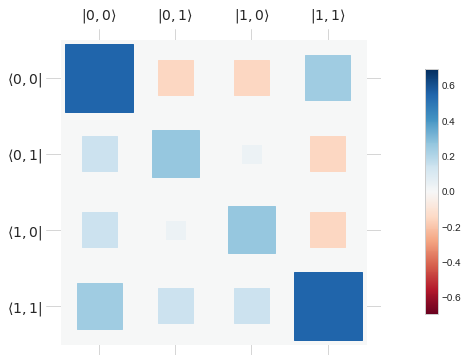

In [57]:
hinton(L_full_maker(Ti, omega_1, xi_opt, Lin, dt))

In [58]:
1.31350478e-05 # 40

1.31350478e-05

In [59]:
1.31390107e-05 # 50

1.31390107e-05

In [14]:
α = 2

In [15]:
new_array = random_sample((4,3,))

NameError: name 'random_sample' is not defined

In [ ]:
new_array

In [ ]:
new_array.any()

In [ ]:
new_array[0] = 0


In [ ]:
new_array

In [ ]:
new_array.any()

In [ ]:
new_array.all()

In [ ]:
max(new_array)

In [ ]:
max(new_array, axis=0)

In [ ]:
from numpy import amax 

In [ ]:
amax(new_array)